todo
    son 10 yılın verilerini al
    tahmini göster testi değil
    veriler hatalı geliyormuş bunu düzelt :P
durumlar
    4 lü grafikteki adj close yerine close değeri kullanıldı


In [180]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf 

from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [181]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [182]:
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['Apple', 'Google', 'Microsoft', 'Amazon']
dfs = []

end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

for stock in stocks:
    df = yf.Ticker(stock).history(start=start_date, end=end_date)
    dfs.append(df)

for index, company_name in enumerate(company_names):
    dfs[index]['company_name'] = company_name


In [183]:
apple = dfs[0]
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2022-10-31 00:00:00-04:00,152.256753,153.330386,151.024060,152.435684,97943200,0.00,0.0,Apple
2022-11-01 00:00:00-04:00,154.165418,154.533231,148.250511,149.761536,80379300,0.00,0.0,Apple
2022-11-02 00:00:00-04:00,148.071578,151.272590,144.144876,144.174698,93604600,0.00,0.0,Apple
2022-11-03 00:00:00-04:00,141.222229,141.957870,137.931751,138.060989,97918500,0.00,0.0,Apple
2022-11-04 00:00:00-04:00,141.486360,142.063898,133.809123,137.792130,140814800,0.23,0.0,Apple
...,...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,170.910004,174.009995,169.929993,173.000000,55980100,0.00,0.0,Apple
2023-10-24 00:00:00-04:00,173.050003,173.669998,171.449997,173.440002,43816600,0.00,0.0,Apple
2023-10-25 00:00:00-04:00,171.880005,173.059998,170.649994,171.100006,57157000,0.00,0.0,Apple


In [184]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-31 00:00:00-04:00 to 2023-10-27 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
 7   company_name  250 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 17.6+ KB


In [185]:
apple.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0
mean,163.995002,165.658221,162.487147,164.128741,6.417777e+07,0.003760,0.0
std,18.817387,18.655138,19.038525,18.827456,2.001017e+07,0.029553,0.0
min,125.474679,127.227194,123.642480,124.488876,3.145820e+07,0.000000,0.0
25%,148.120535,150.017114,146.812329,148.244358,5.042202e+07,0.000000,0.0
50%,167.470190,169.173337,166.186995,167.561661,5.891015e+07,0.000000,0.0
75%,178.199838,179.870323,177.073157,178.554108,7.134730e+07,0.000000,0.0
max,195.975362,197.962667,195.016650,196.185074,1.601569e+08,0.240000,0.0


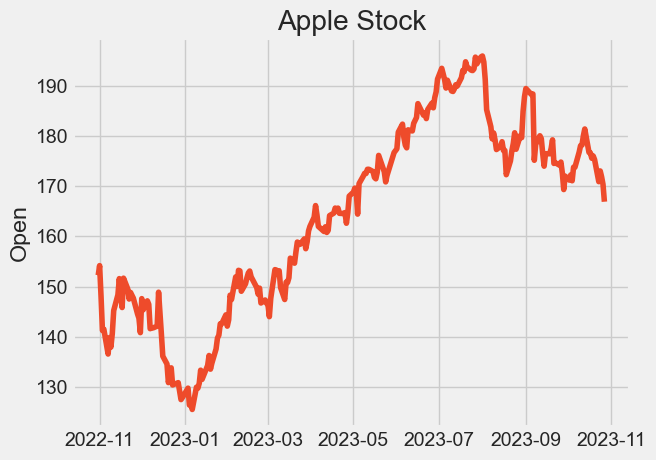

In [186]:
color = '#EE4B2B'
plt.plot(apple['Open'], c=color)
plt.ylabel('Open')
plt.title('Apple Stock')
plt.show()

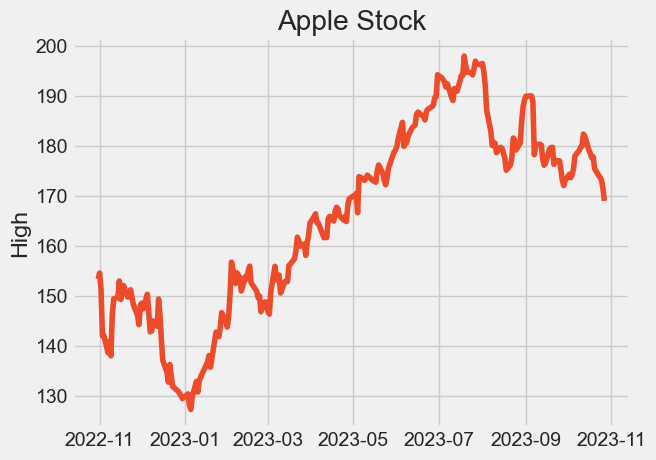

In [187]:
plt.plot(apple['High'], color=color)
plt.ylabel('High')
plt.title('Apple Stock')
plt.show()

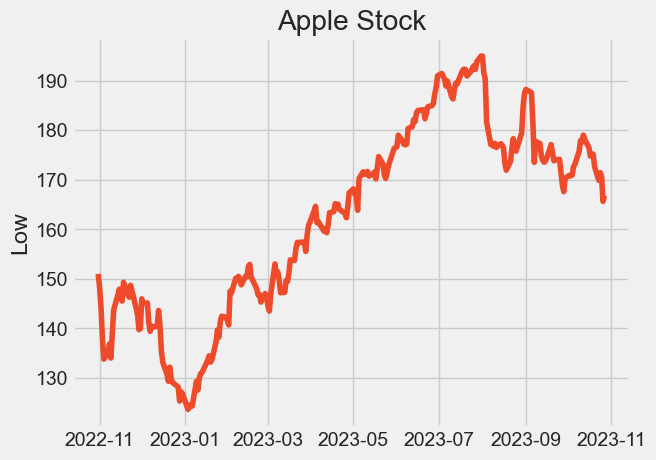

In [188]:
plt.plot(apple['Low'], color=color)
plt.ylabel('Low')
plt.title('Apple Stock')
plt.show()

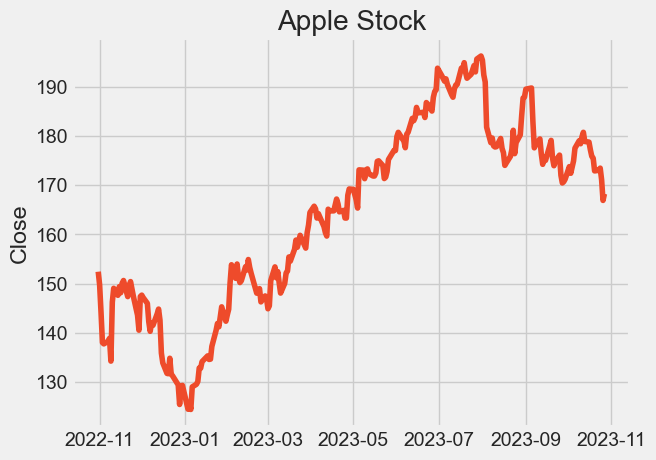

In [189]:
plt.plot(apple['Close'], color=color)
plt.ylabel('Close')
plt.title('Apple Stock')
plt.show()

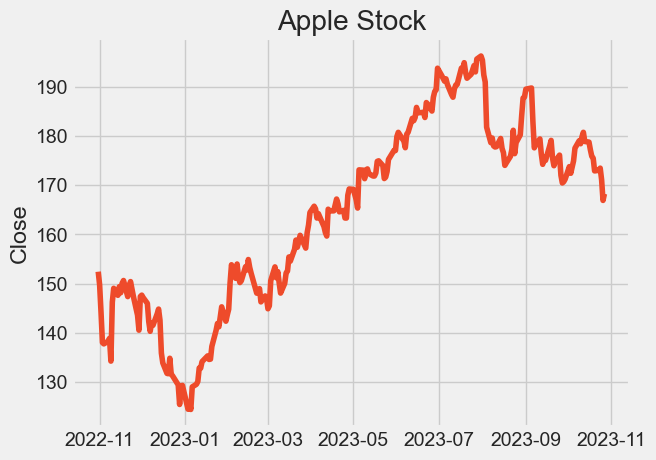

In [190]:
plt.plot(apple['Close'], color=color)
plt.ylabel('Close')
plt.title('Apple Stock')
plt.show()

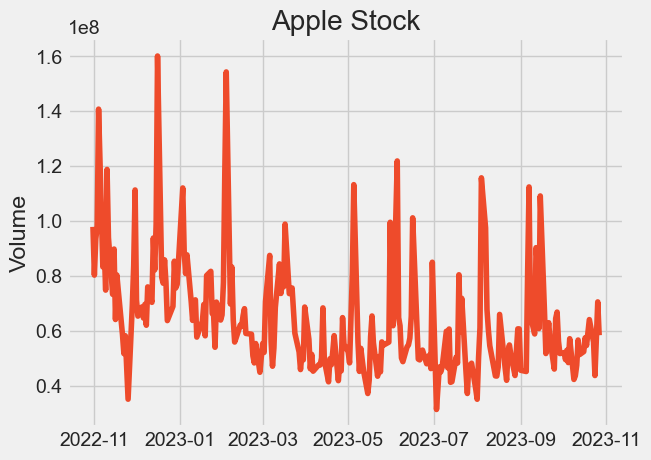

In [191]:
plt.plot(apple['Volume'], color=color)
plt.ylabel('Volume')
plt.title('Apple Stock')
plt.show()

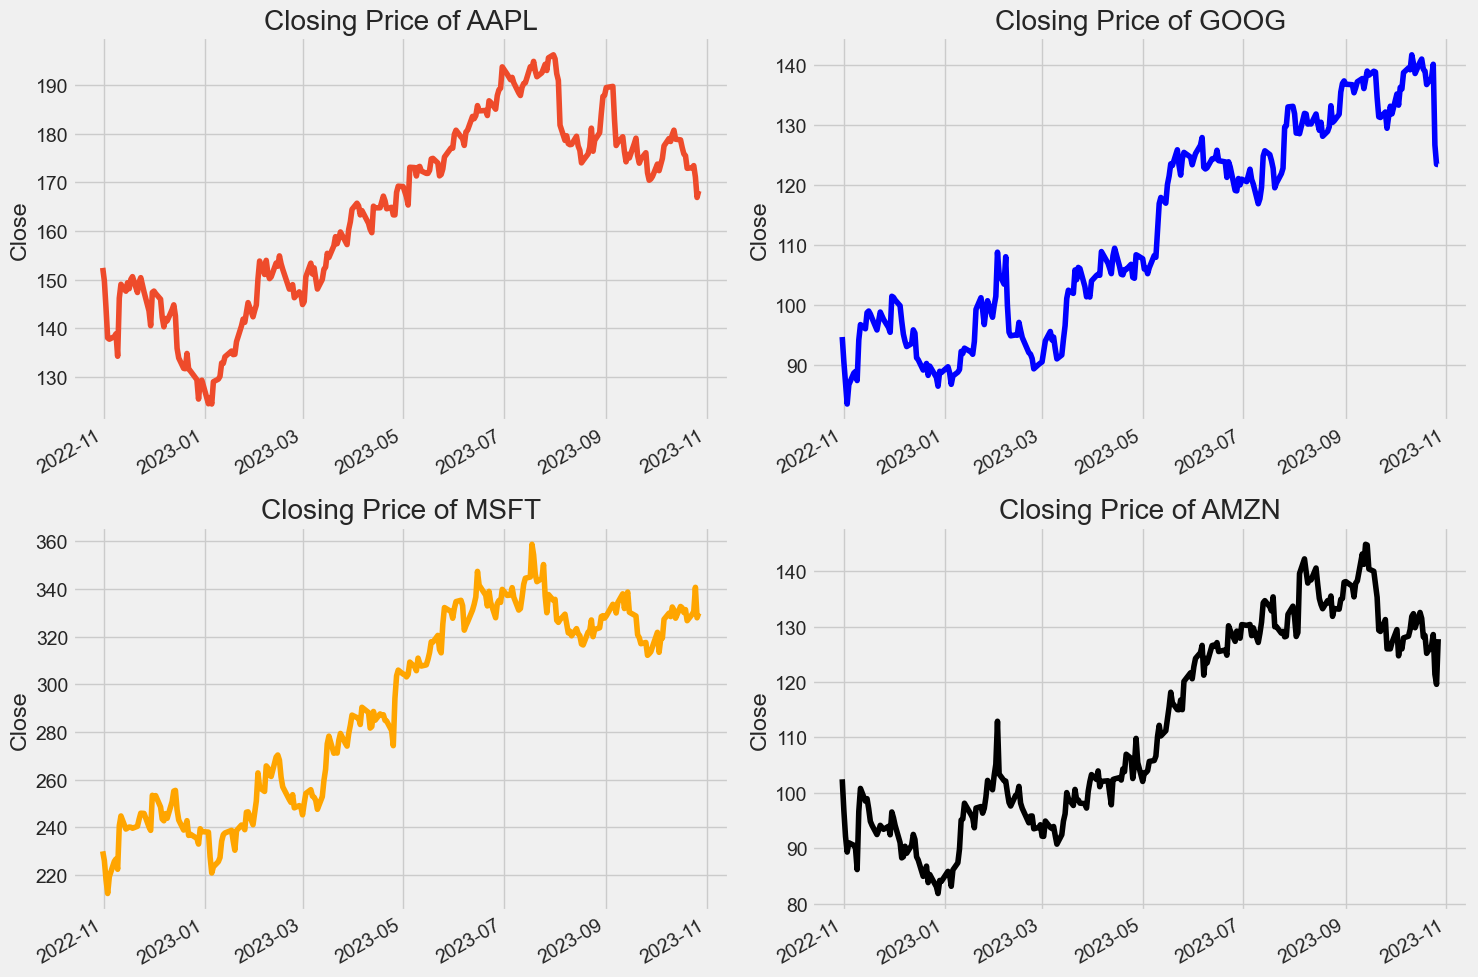

In [192]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colors = [color, 'blue', 'orange', 'black']

for i, company in enumerate(dfs, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot(color=colors[i - 1])
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks[i - 1]}")
    
plt.tight_layout()

In [194]:
end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 10, end_date.month, end_date.day)

df = yf.Ticker(stocks[0]).history(start=start_date, end=end_date)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-29 00:00:00-04:00,16.715363,16.808248,16.038046,16.104748,635807200,0.0,0.0
2013-10-30 00:00:00-04:00,16.196072,16.442624,16.115342,16.360960,354163600,0.0,0.0
2013-10-31 00:00:00-04:00,16.364082,16.441694,16.247818,16.292391,275696400,0.0,0.0
2013-11-01 00:00:00-04:00,16.333529,16.357841,16.078561,16.209162,274890000,0.0,0.0
2013-11-04 00:00:00-05:00,16.242518,16.420809,16.171140,16.418627,244627600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-23 00:00:00-04:00,170.910004,174.009995,169.929993,173.000000,55980100,0.0,0.0
2023-10-24 00:00:00-04:00,173.050003,173.669998,171.449997,173.440002,43816600,0.0,0.0
2023-10-25 00:00:00-04:00,171.880005,173.059998,170.649994,171.100006,57157000,0.0,0.0


In [195]:
data = df.filter(['Close'])
dataset = data.values.reshape(-1, 1)
training_data_len = int(np.ceil( len(dataset) * .95 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
training_data_len

2392

In [196]:
test_data_len

126

In [197]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00241427],
       [0.0038336 ],
       [0.00345375],
       ...,
       [0.86103698],
       [0.83771493],
       [0.8450827 ]])

In [198]:
train_data = scaled_data[0 : int(training_data_len), :]

In [199]:
train_data = scaled_data[0:int(training_data_len), :]
WINDOW_SIZE = 60
x_train = []
y_train = []

for i in range(WINDOW_SIZE, len(train_data)):
    x_train.append(train_data[i-WINDOW_SIZE:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00241427, 0.0038336 , 0.00345375, 0.00299269, 0.00415306,
       0.0039286 , 0.0036716 , 0.00220743, 0.00360902, 0.00334679,
       0.00351352, 0.00362116, 0.00492897, 0.00437844, 0.0032738 ,
       0.00343362, 0.0026434 , 0.00370977, 0.00347701, 0.00416132,
       0.00583908, 0.00802042, 0.00977632, 0.00893572, 0.01155652,
       0.01132728, 0.01183093, 0.01046233, 0.01157566, 0.01142281,
       0.0106951 , 0.01055267, 0.0094915 , 0.0100247 , 0.00958876,
       0.00885583, 0.00775991, 0.00855192, 0.01221128, 0.01179099,
       0.01113626, 0.01047451, 0.00950717, 0.01063603, 0.00926569,
       0.00715553, 0.00766788, 0.00699226, 0.00758622, 0.00638093,
       0.00575914, 0.00624377, 0.00809514, 0.01000038, 0.00946023,
       0.0071017 , 0.00856057, 0.00898436, 0.00979542, 0.00803957])]
[0.008808928032096042]

[array([0.00241427, 0.0038336 , 0.00345375, 0.00299269, 0.00415306,
       0.0039286 , 0.0036716 , 0.00220743, 0.00360902, 0.00334679,
       0.00351352, 0.00362116, 0.0

"\n    x_train : y_train\n    0, 1, 2, ..., 59 : 60    1.dizi # 0, 1 gibi değerler train_data'daki o indexdeti değerler\n    1, 2, 3, ..., 60 : 61    2.dizi\n    ...\n"

In [200]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [201]:
x_train.shape, y_train.shape

((2332, 60), (2332,))

In [204]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [206]:
x_train.shape[1]

60

In [207]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 101s 41ms/step - loss: 0.0013


In [208]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [209]:
test_data = scaled_data[training_data_len - 60: , :]
test_data

array([[0.76544233],
       [0.75016267],
       [0.76626978],
       [0.75121074],
       [0.74541884],
       [0.74746283],
       [0.7631527 ],
       [0.75956167],
       [0.77132899],
       [0.76237918],
       [0.75597072],
       [0.73348576],
       [0.73586127],
       [0.7385683 ],
       [0.72370731],
       [0.73039201],
       [0.7275745 ],
       [0.71597294],
       [0.71928773],
       [0.74757339],
       [0.76304222],
       [0.75072242],
       [0.75773855],
       [0.74514251],
       [0.73359624],
       [0.74447964],
       [0.75619168],
       [0.75840151],
       [0.77420178],
       [0.76950587],
       [0.78276479],
       [0.79315099],
       [0.78514038],
       [0.7912174 ],
       [0.79850977],
       [0.78762637],
       [0.7841459 ],
       [0.80138256],
       [0.81016661],
       [0.82419897],
       [0.83121518],
       [0.828232  ],
       [0.81790099],
       [0.82287322],
       [0.8083435 ],
       [0.80154833],
       [0.79768122],
       [0.827

In [210]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)


In [211]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [212]:
predictions = model.predict(x_test)

4/4 [==============================] - 2s 55ms/step


In [213]:
predictions.shape

(125, 1)

In [214]:
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.800318064389879

C:\Users\Tacab\AppData\Local\Temp\ipykernel_11948\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


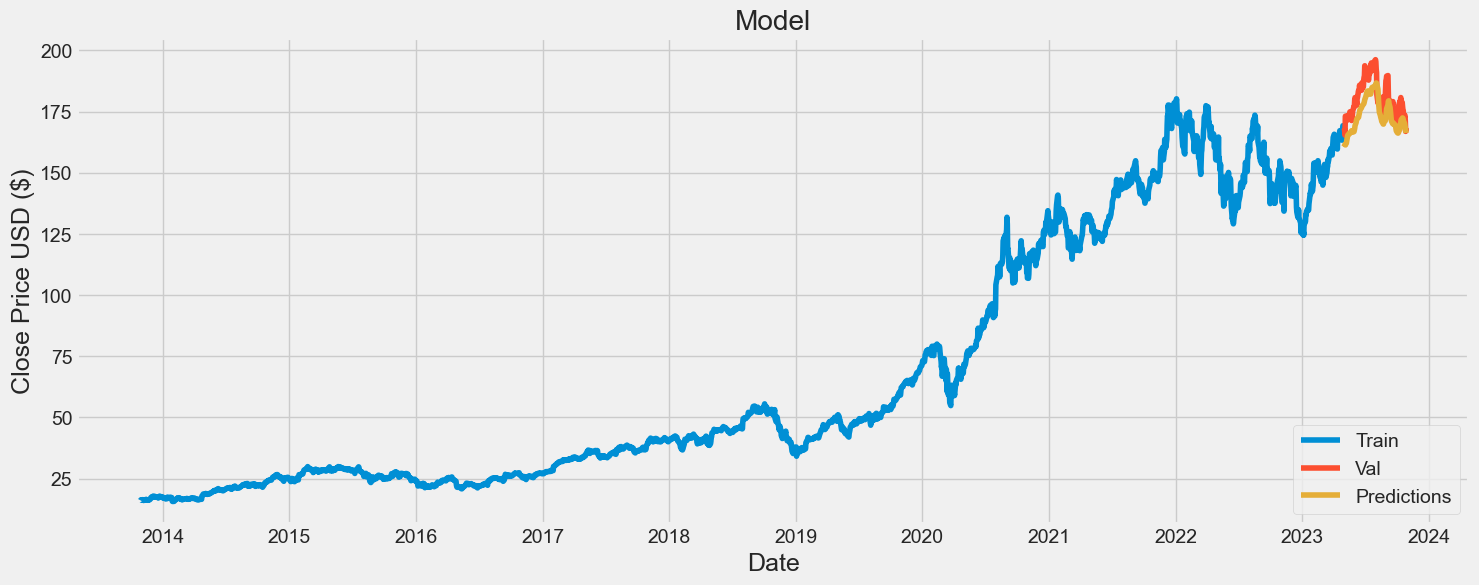

In [215]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [216]:
data

,Close
Date,
2013-10-29 00:00:00-04:00,16.104748
2013-10-30 00:00:00-04:00,16.360960
2013-10-31 00:00:00-04:00,16.292391
2013-11-01 00:00:00-04:00,16.209162
2013-11-04 00:00:00-05:00,16.418627
...,...
2023-10-23 00:00:00-04:00,173.000000
2023-10-24 00:00:00-04:00,173.440002
2023-10-25 00:00:00-04:00,171.100006


In [217]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
pred_data = scaled_data[len(data) - 60: , :]
# Create the data sets x_test and y_test
preds = np.array([])
for i in range(0, 30):
    row = np.reshape(pred_data[i :], (1, 60, 1))
    prediction = model.predict(row)
    pred_data = np.append(pred_data, prediction, axis=0)
    preds = np.append(preds, prediction)

1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 38ms/step


In [218]:
pred_data

array([[0.92000443],
       [0.90263329],
       [0.90788886],
       [0.89898207],
       [0.89776494],
       [0.89809731],
       [0.90734863],
       [0.89621384],
       [0.89133899],
       [0.87710199],
       [0.87981646],
       [0.88729497],
       [0.89499511],
       [0.91654442],
       [0.89028644],
       [0.90263988],
       [0.91139257],
       [0.93316344],
       [0.95271847],
       [0.9539372 ],
       [0.96274534],
       [0.96407481],
       [0.92646048],
       [0.89682321],
       [0.90025778],
       [0.90679463],
       [0.88984325],
       [0.87826536],
       [0.88674105],
       [0.88269703],
       [0.89909449],
       [0.90518817],
       [0.88535613],
       [0.87671418],
       [0.8814783 ],
       [0.88862452],
       [0.8658011 ],
       [0.85732533],
       [0.8587657 ],
       [0.86164635],
       [0.87571708],
       [0.86823849],
       [0.87521853],
       [0.88214311],
       [0.89643548],
       [0.90474498],
       [0.90142115],
       [0.909

In [219]:
preds = preds.reshape(-1, 1)
preds = scaler.inverse_transform(preds)
preds = preds.reshape(30)
preds

array([165.03603053, 163.66205107, 162.2209855 , 160.76255394,
       159.31245031, 157.88297283, 156.47881269, 155.1009275 ,
       153.74835964, 152.41923696, 151.11153664, 149.82322512,
       148.5525163 , 147.29785005, 146.05777382, 144.83123317,
       143.61708757, 142.41465918, 141.22308723, 140.04176918,
       138.87015628, 137.70769981, 136.55392633, 135.40841623,
       134.27072836, 133.14048613, 132.0173022 , 130.90083225,
       129.79068896, 128.68660332])

In [220]:
data_with_predicts = data.copy()
data_with_predicts = data_with_predicts.reset_index()
data_with_predicts

,Date,Close
0,2013-10-29 00:00:00-04:00,16.104748
1,2013-10-30 00:00:00-04:00,16.360960
2,2013-10-31 00:00:00-04:00,16.292391
3,2013-11-01 00:00:00-04:00,16.209162
4,2013-11-04 00:00:00-05:00,16.418627
...,...,...
2512,2023-10-23 00:00:00-04:00,173.000000
2513,2023-10-24 00:00:00-04:00,173.440002
2514,2023-10-25 00:00:00-04:00,171.100006
2515,2023-10-26 00:00:00-04:00,166.889999


In [221]:
preds

array([165.03603053, 163.66205107, 162.2209855 , 160.76255394,
       159.31245031, 157.88297283, 156.47881269, 155.1009275 ,
       153.74835964, 152.41923696, 151.11153664, 149.82322512,
       148.5525163 , 147.29785005, 146.05777382, 144.83123317,
       143.61708757, 142.41465918, 141.22308723, 140.04176918,
       138.87015628, 137.70769981, 136.55392633, 135.40841623,
       134.27072836, 133.14048613, 132.0173022 , 130.90083225,
       129.79068896, 128.68660332])

In [222]:
temp = []
last_date = data_with_predicts['Date'].max()
for i, predicted in enumerate(preds, 1):
    date = last_date + timedelta(days=i)
    row = pd.DataFrame([[date, predicted]])
    temp.append(row)

In [223]:
predicted_df = pd.concat(temp).reset_index(drop=True)

In [224]:
predicted_df.columns = data_with_predicts.columns

In [225]:
predicted_df

,Date,Close
0,2023-10-28 00:00:00-04:00,165.036031
1,2023-10-29 00:00:00-04:00,163.662051
2,2023-10-30 00:00:00-04:00,162.220986
3,2023-10-31 00:00:00-04:00,160.762554
4,2023-11-01 00:00:00-04:00,159.312450
5,2023-11-02 00:00:00-04:00,157.882973
6,2023-11-03 00:00:00-04:00,156.478813
7,2023-11-04 00:00:00-04:00,155.100927
8,2023-11-05 00:00:00-04:00,153.748360
9,2023-11-05 23:00:00-05:00,152.419237


In [226]:
data_copy = data.reset_index().sort_values(by='Date').copy()

In [227]:
data_copy

,Date,Close
0,2013-10-29 00:00:00-04:00,16.104748
1,2013-10-30 00:00:00-04:00,16.360960
2,2013-10-31 00:00:00-04:00,16.292391
3,2013-11-01 00:00:00-04:00,16.209162
4,2013-11-04 00:00:00-05:00,16.418627
...,...,...
2512,2023-10-23 00:00:00-04:00,173.000000
2513,2023-10-24 00:00:00-04:00,173.440002
2514,2023-10-25 00:00:00-04:00,171.100006
2515,2023-10-26 00:00:00-04:00,166.889999


In [228]:
data_copy['Date'] = data_copy['Date'].dt.tz_localize(None)

In [229]:
predicted_df['Date'] = predicted_df['Date'].dt.tz_localize(None)

In [230]:
data_copy = data_copy.sort_values(by='Date')

<Axes: xlabel='Date', ylabel='Close'>

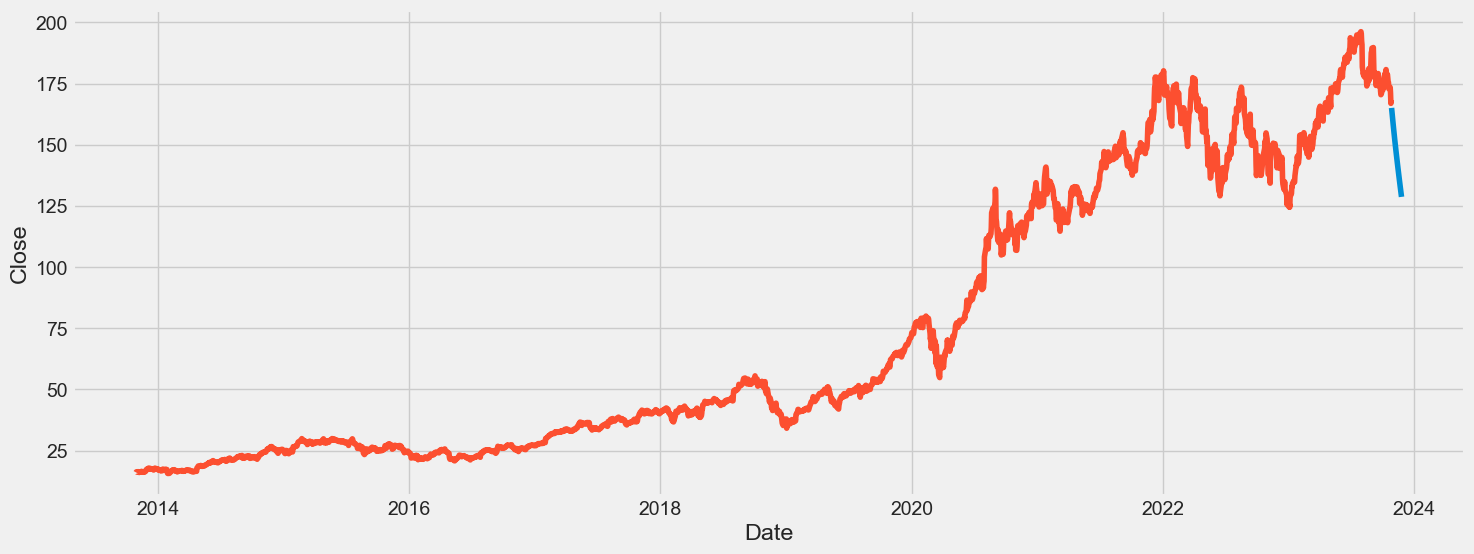

In [231]:
plt.figure(figsize=(16,6))
sns.lineplot(predicted_df, x='Date', y='Close')
sns.lineplot(data_copy, x='Date', y='Close')

In [232]:
data_copy = data_copy.query('Date >= "2023-01-01" ')

<Axes: xlabel='Date', ylabel='Close'>

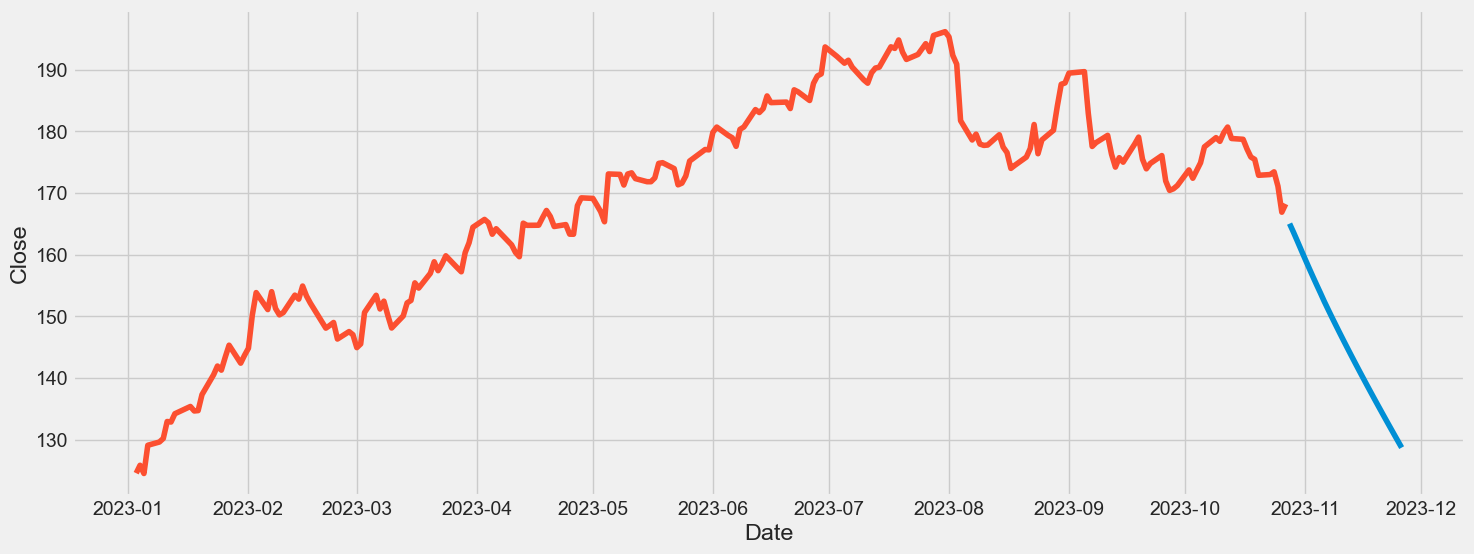

In [233]:
plt.figure(figsize=(16,6))
sns.lineplot(predicted_df, x='Date', y='Close')
sns.lineplot(data_copy, x='Date', y='Close')

In [234]:
data_with_predicted = pd.concat([data_copy, predicted_df]).reset_index(drop=True)

In [235]:
first_prediction_date = predicted_df['Date'].min()
data_with_predicted['is_a_prediction'] = data_with_predicted['Date'].apply(lambda x: 1 if x >= first_prediction_date else 0)

<Axes: xlabel='Date', ylabel='Close'>

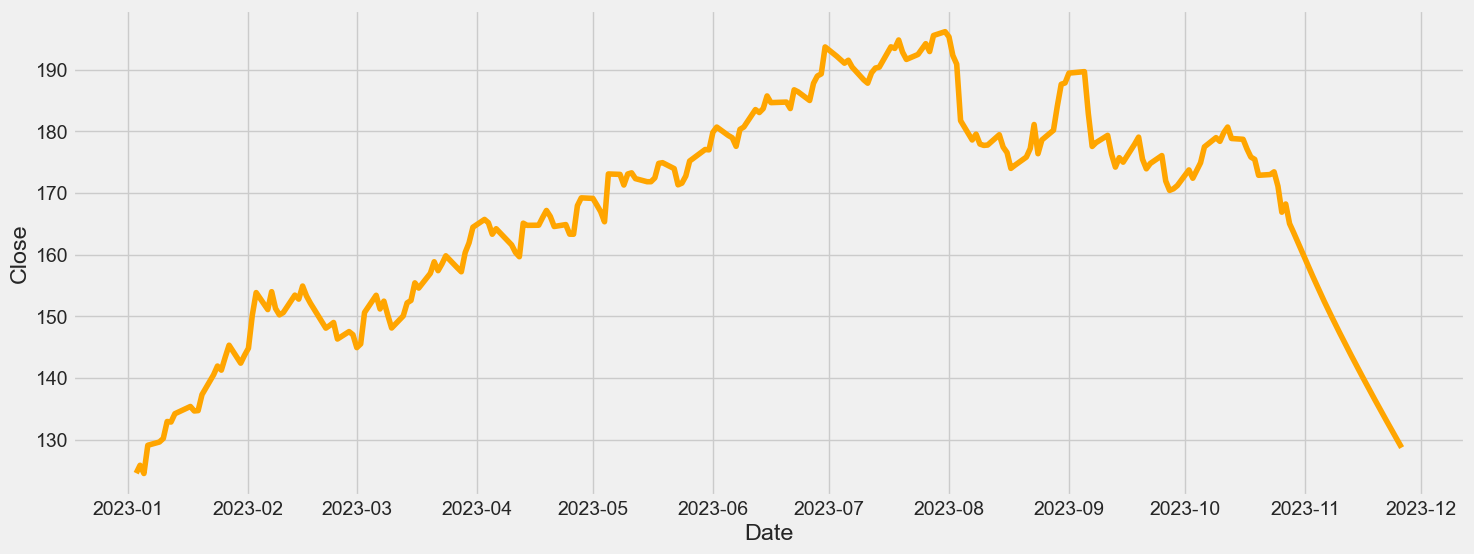

In [236]:
plt.figure(figsize=(16,6))
sns.lineplot(data_with_predicted, x='Date', y='Close', color='orange')